In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rio = pd.read_csv('./data/rio_athletes.csv')
tokyo = pd.read_csv('./data/tokyo_athletes.csv')

In [3]:
rio

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,Nation
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,Spain
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,Republic of Korea
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,Canada
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,Republic of Moldova
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0,Cuba
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0,Czech Republic
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0,People's Republic of China
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0,Vietnam


In [4]:
tokyo

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [5]:
len(rio['Nation'].unique()), len(tokyo['NOC'].unique())

(207, 206)

In [6]:
rio_set = set(rio['Nation'].unique())
tokyo_set = set(tokyo['NOC'].unique())

intersec = rio_set.intersection(tokyo_set)

In [7]:
len(intersec)

200

In [8]:
rio_inter_mask = rio['Nation'].isin(intersec)
tokyo_inter_mask = tokyo['NOC'].isin(intersec)

rio_inter = rio[rio_inter_mask]
tokyo_inter = tokyo[tokyo_inter_mask]

In [9]:
rio_counter = rio_inter.groupby('Nation').size()
tokyo_counter = tokyo_inter.groupby('NOC').size()

In [10]:
rio_counter.sum()

11183

In [11]:
tokyo_counter.sum()

10698

Text(0.5, 1.0, 'Rio')

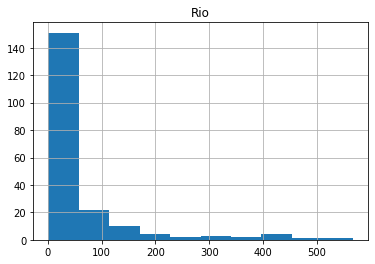

In [17]:
rio_counter.sort_index().hist()
plt.title('Rio')

Text(0.5, 1.0, 'Tokyo')

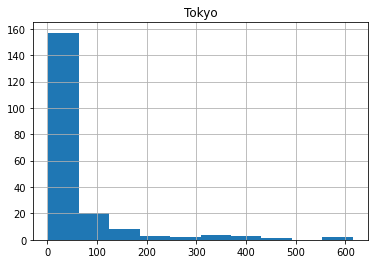

In [20]:
tokyo_counter.sort_index().hist()
plt.title('Tokyo')

In [21]:
from scipy.stats import ks_2samp

In [22]:
rio_list = rio_counter.sort_index().tolist()
tokyo_list = tokyo_counter.sort_index().tolist()

ks_2samp(rio_list, tokyo_list, alternative='less')

KstestResult(statistic=0.115, pvalue=0.0710610696373133)